# Plotting the solar equator and prime meridian

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/plot_equator_prime_meridian.html

This example shows how you can draw the solar equator and prime meridian
(zero Carrington longitude) on Maps as seen by the axes observer.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE
from sunpy.visualization import drawing

Let's import sample AIA data and plot it with the equator and prime meridian.

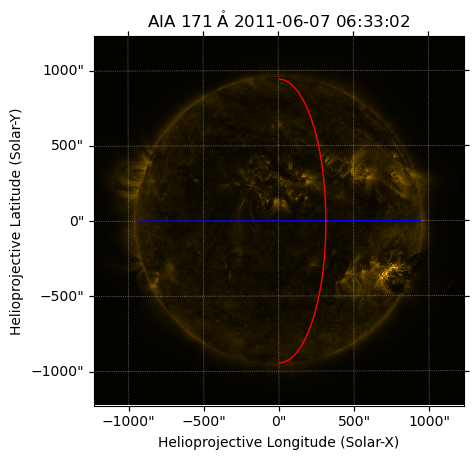

In [ ]:
aia_map = sunpy.map.Map(AIA_171_IMAGE)

fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot()
drawing.equator(ax, color='blue')
drawing.prime_meridian(ax, color='red')
plt.show()

The draw methods also work with heliogaphic maps. To demonstrate this, let's
convert the AIA map to a heliographic Carrington map then plot it with the
equator and prime meridian.

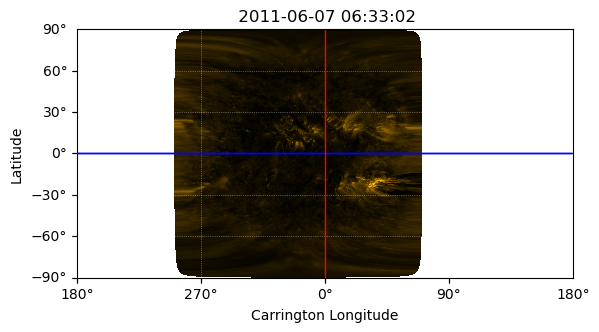

In [ ]:
frame_out = SkyCoord(0, 0, unit=u.deg,
                     frame="heliographic_carrington",
                     obstime=aia_map.date,
                     observer=aia_map.observer_coordinate,
                     rsun=aia_map.coordinate_frame.rsun)
header = sunpy.map.make_fitswcs_header((720, 1440),
                                       frame_out,
                                       scale=(360 / 1440,
                                              180 / 720) * u.deg / u.pix,
                                       projection_code="CAR")
outmap = aia_map.reproject_to(header)

fig = plt.figure()
ax = fig.add_subplot(projection=outmap)
outmap.plot(axes=ax)
drawing.equator(ax, color='blue')
drawing.prime_meridian(ax, color='red')
plt.show()